In [1]:
import os
from pathlib import Path
os.chdir(r"C:\Users\Mohad\Documents\Programming\NeuroPHorm")
import neurophorm as nf


In [2]:
OUTDIR = Path("examples/persistences")   # where data is loaded from
SAVE_FMT = "png"
LABEL_STYLES = {
    "A": ("#1f77b4", "-"),
    "B": ("#ff7f0e", "--"),
}
HOMOLOGY_DIMS = [0, 1, 2]   # adjust to [0,1,2] if you computed H2 as well


In [3]:
data = nf.load_tda_results(
        output_directory=OUTDIR,
        load_all=False,
        load_betti=True,
        load_entropy=True,
        load_amplitude=True,
        include_all_betti_x=True,
        interpolate_betti_to_shared_x=True,
    )

[INFO] 2025-09-05 16:39:37,929 - neurophorm.persistence - load_tda_results: start | out_dir=examples\persistences | dataset_names=None | load_all=False
[INFO] 2025-09-05 16:39:38,187 - neurophorm.persistence - load_tda_results: done | datasets_loaded=2


In [4]:
data["A"].keys()

dict_keys(['betti_curves_original', 'betti_x_list', 'betti_curves_shared', 'betti_x_shared', 'persistence_entropy', 'wasserstein_amplitude', 'bottleneck_amplitude'])

[INFO] 2025-09-05 16:39:38,220 - neurophorm.visualization - plot_betti_curves: start | groups=None | dims=[0, 1, 2] | save=False(pdf) | show=True


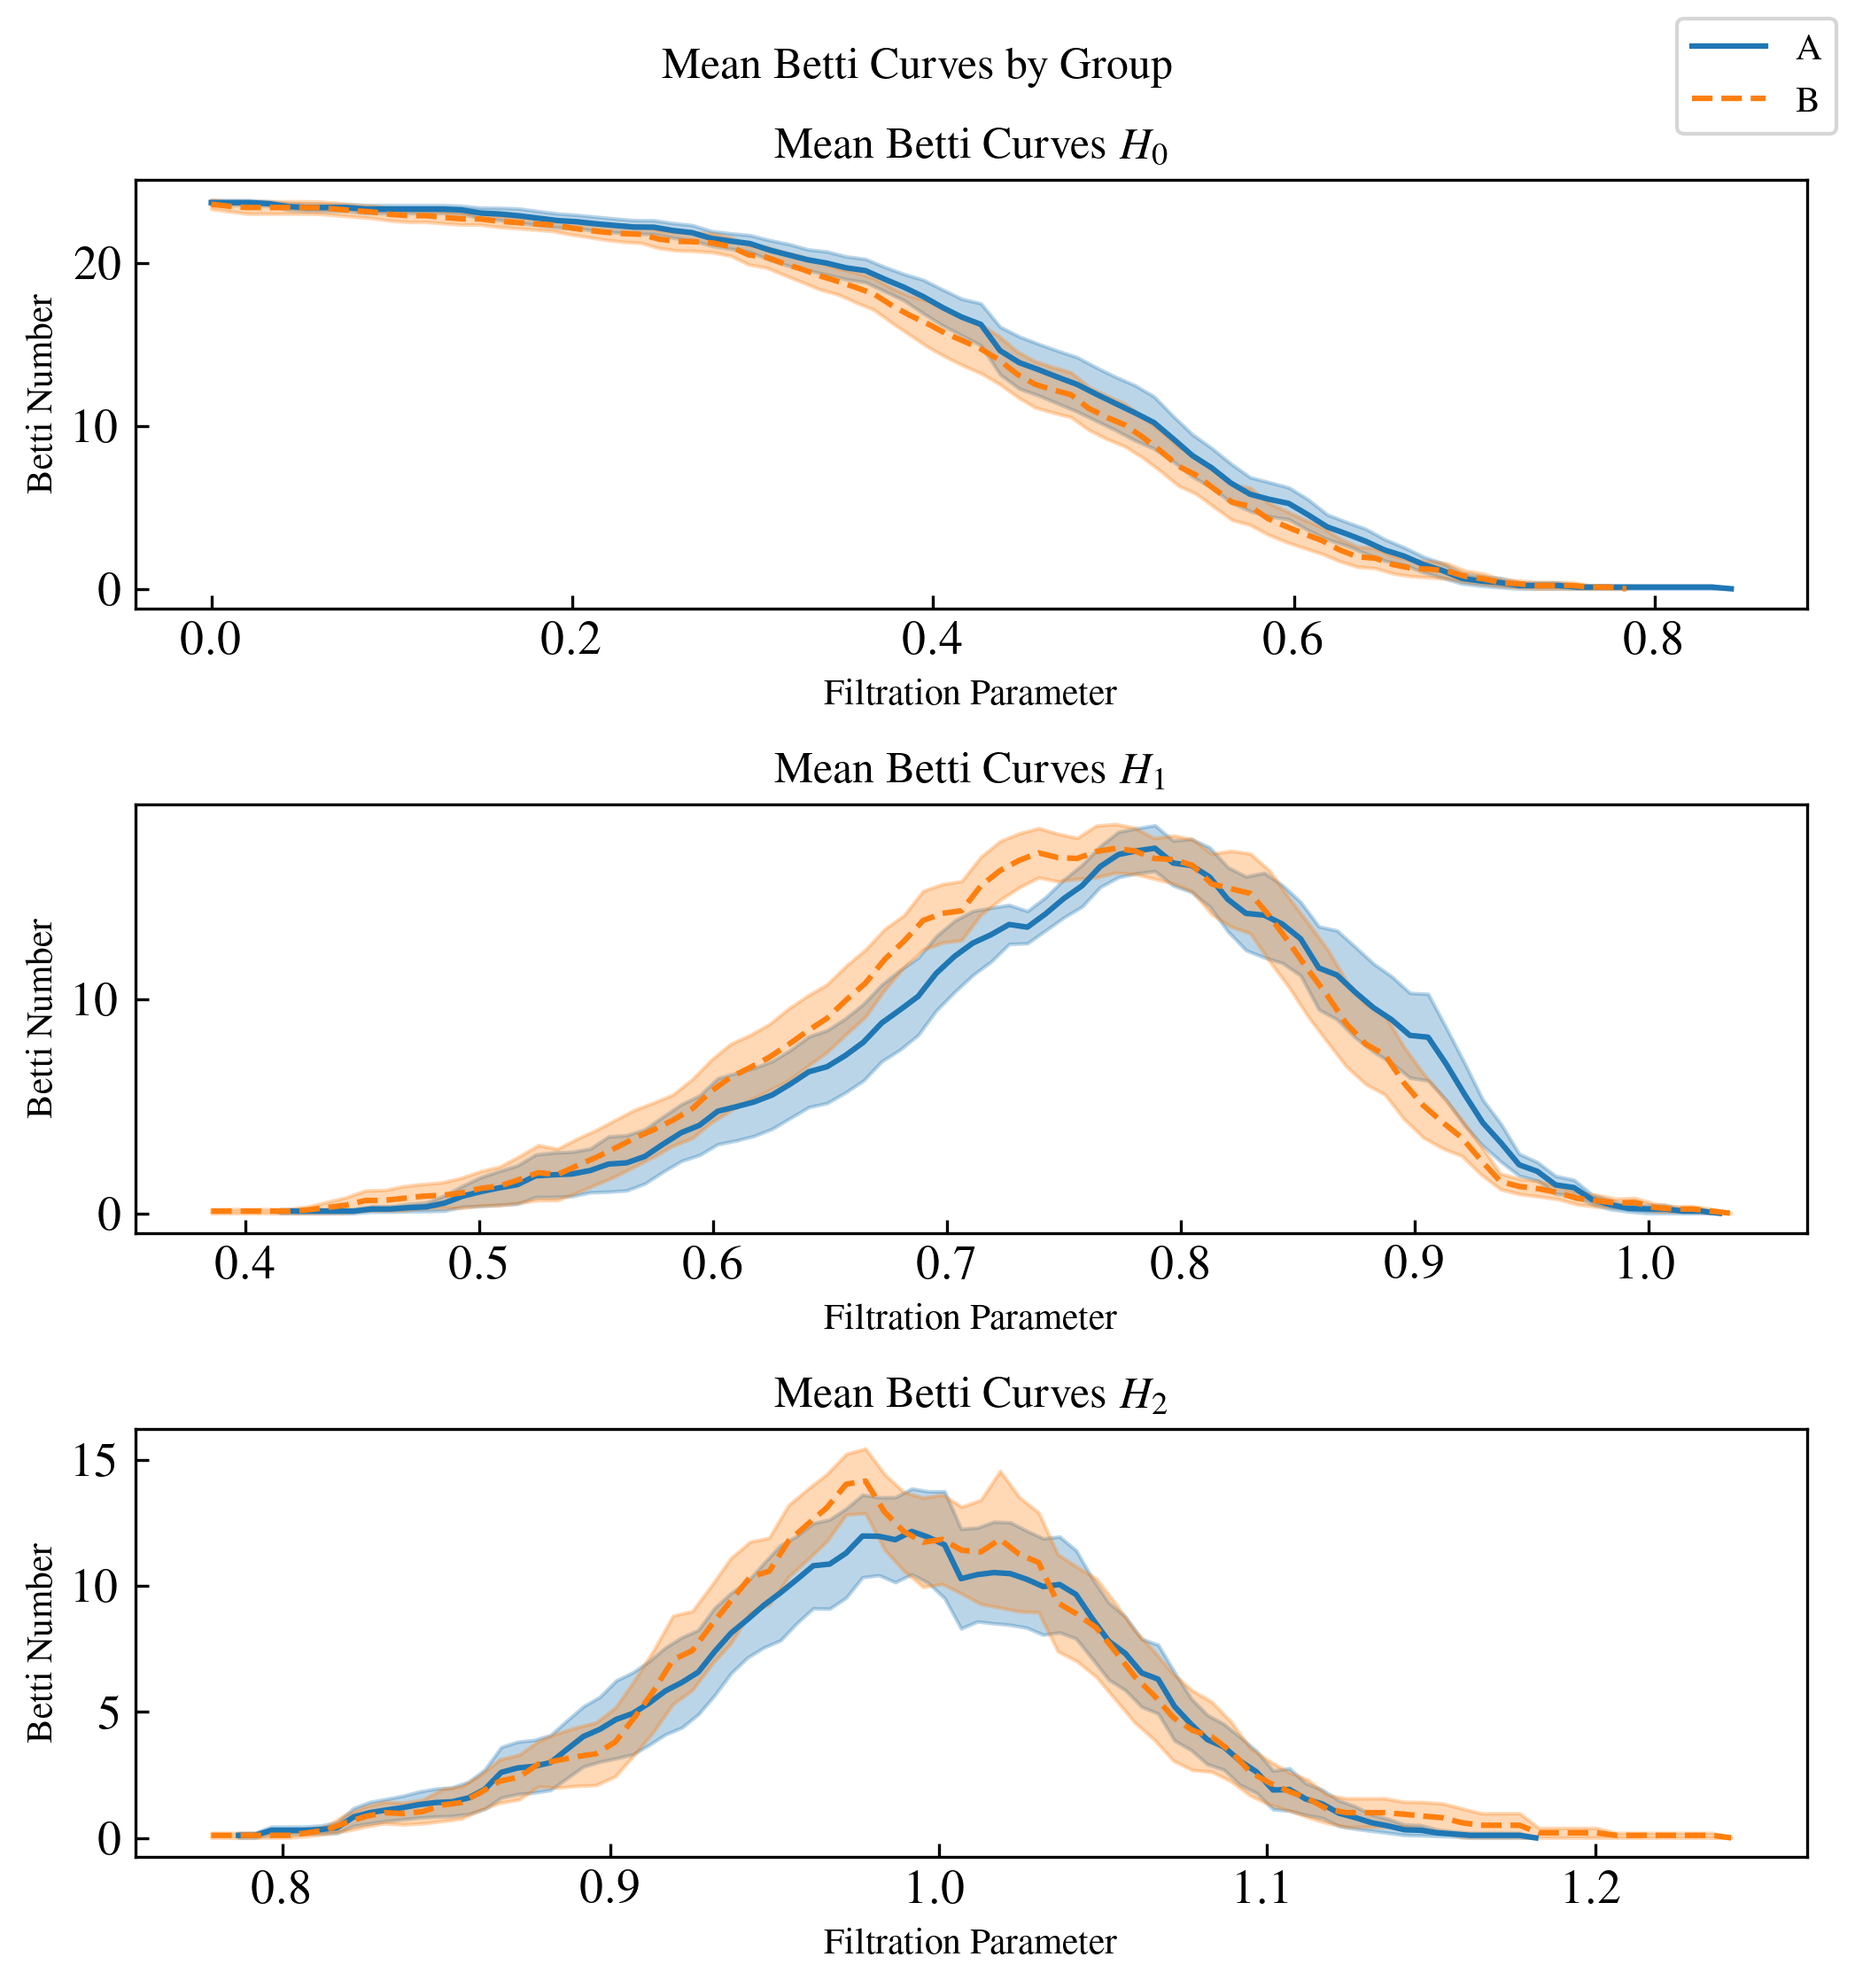

[INFO] 2025-09-05 16:39:39,570 - neurophorm.visualization - plot_betti_curves: done


In [5]:
nf.plot_betti_curves(
        data,
        dimensions=HOMOLOGY_DIMS,
        label_styles=LABEL_STYLES,
    )

[INFO] 2025-09-05 16:39:39,600 - neurophorm.visualization - plot_p_values: start | feature=persistence_entropy | test=auto


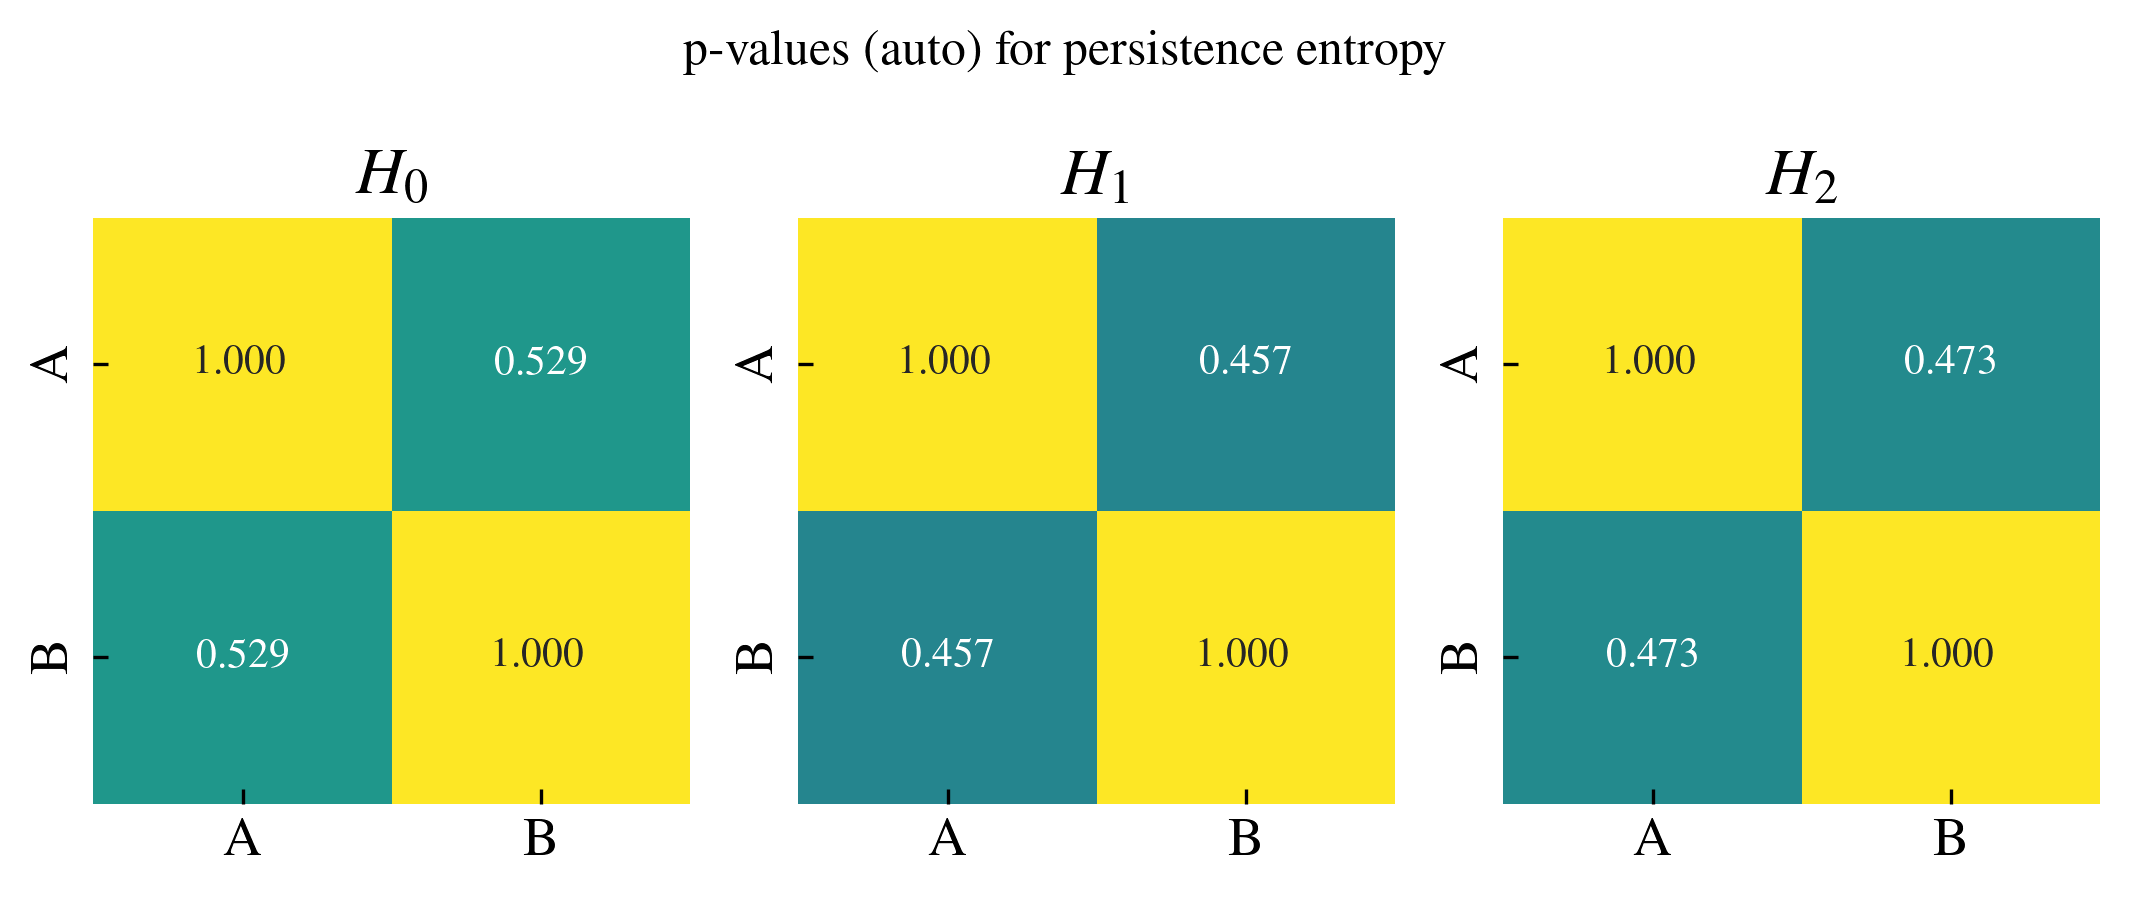

[INFO] 2025-09-05 16:39:40,354 - neurophorm.visualization - plot_p_values: done


In [6]:
p = nf.plot_p_values(
        data,
        feature_name="persistence_entropy",
        dimensions=HOMOLOGY_DIMS,
        multitest="bonferroni",
    )

[INFO] 2025-09-05 16:39:40,379 - neurophorm.visualization - plot_swarm_violin: start | feature=wasserstein_amplitude | groups=None | dims=[0] | save=False


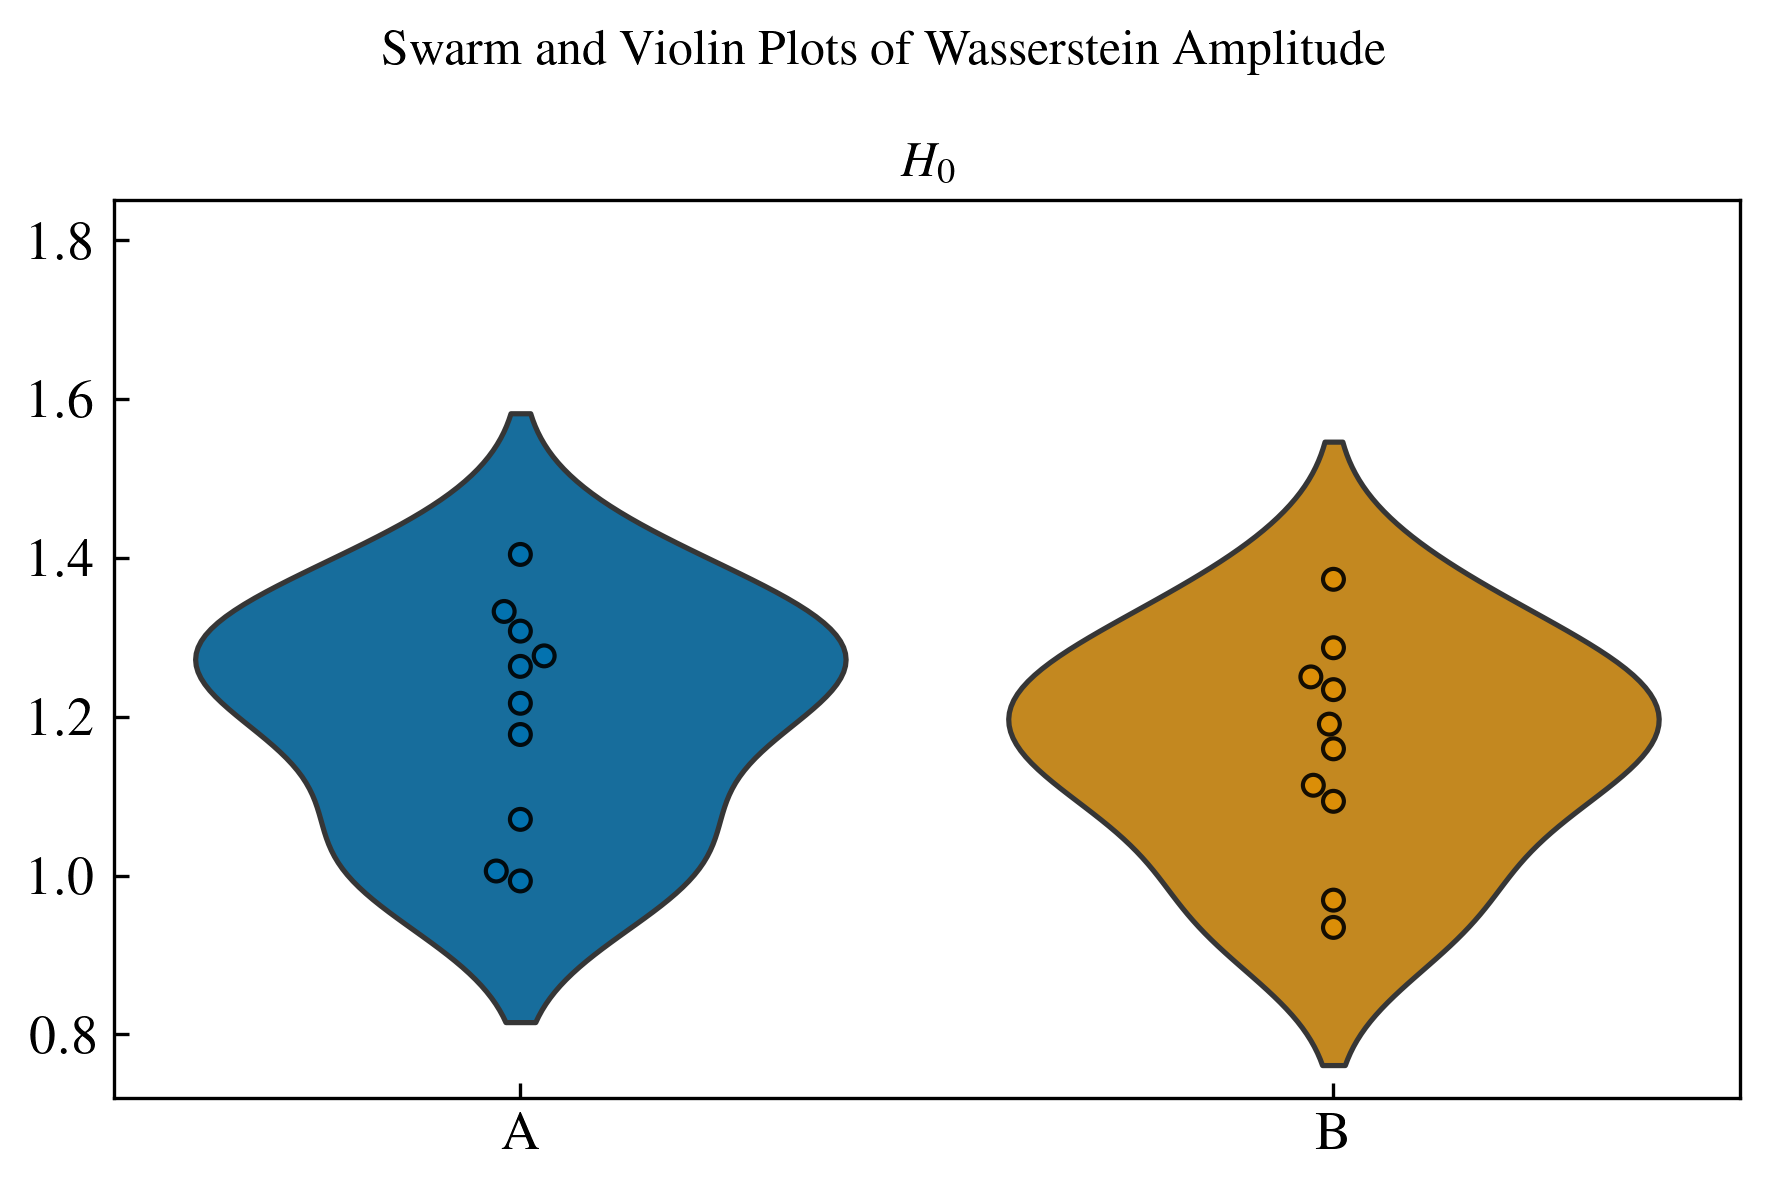

[INFO] 2025-09-05 16:39:40,788 - neurophorm.visualization - plot_swarm_violin: done


In [7]:
nf.plot_swarm_violin(
        data,
        feature_name="wasserstein_amplitude",
        dimensions=[0],
        figsize=(6,4),
        show_sig=True)

[INFO] 2025-09-05 16:39:40,815 - neurophorm.visualization - plot_kde_dist: start | feature=bottleneck_amplitude | groups=None | save=False


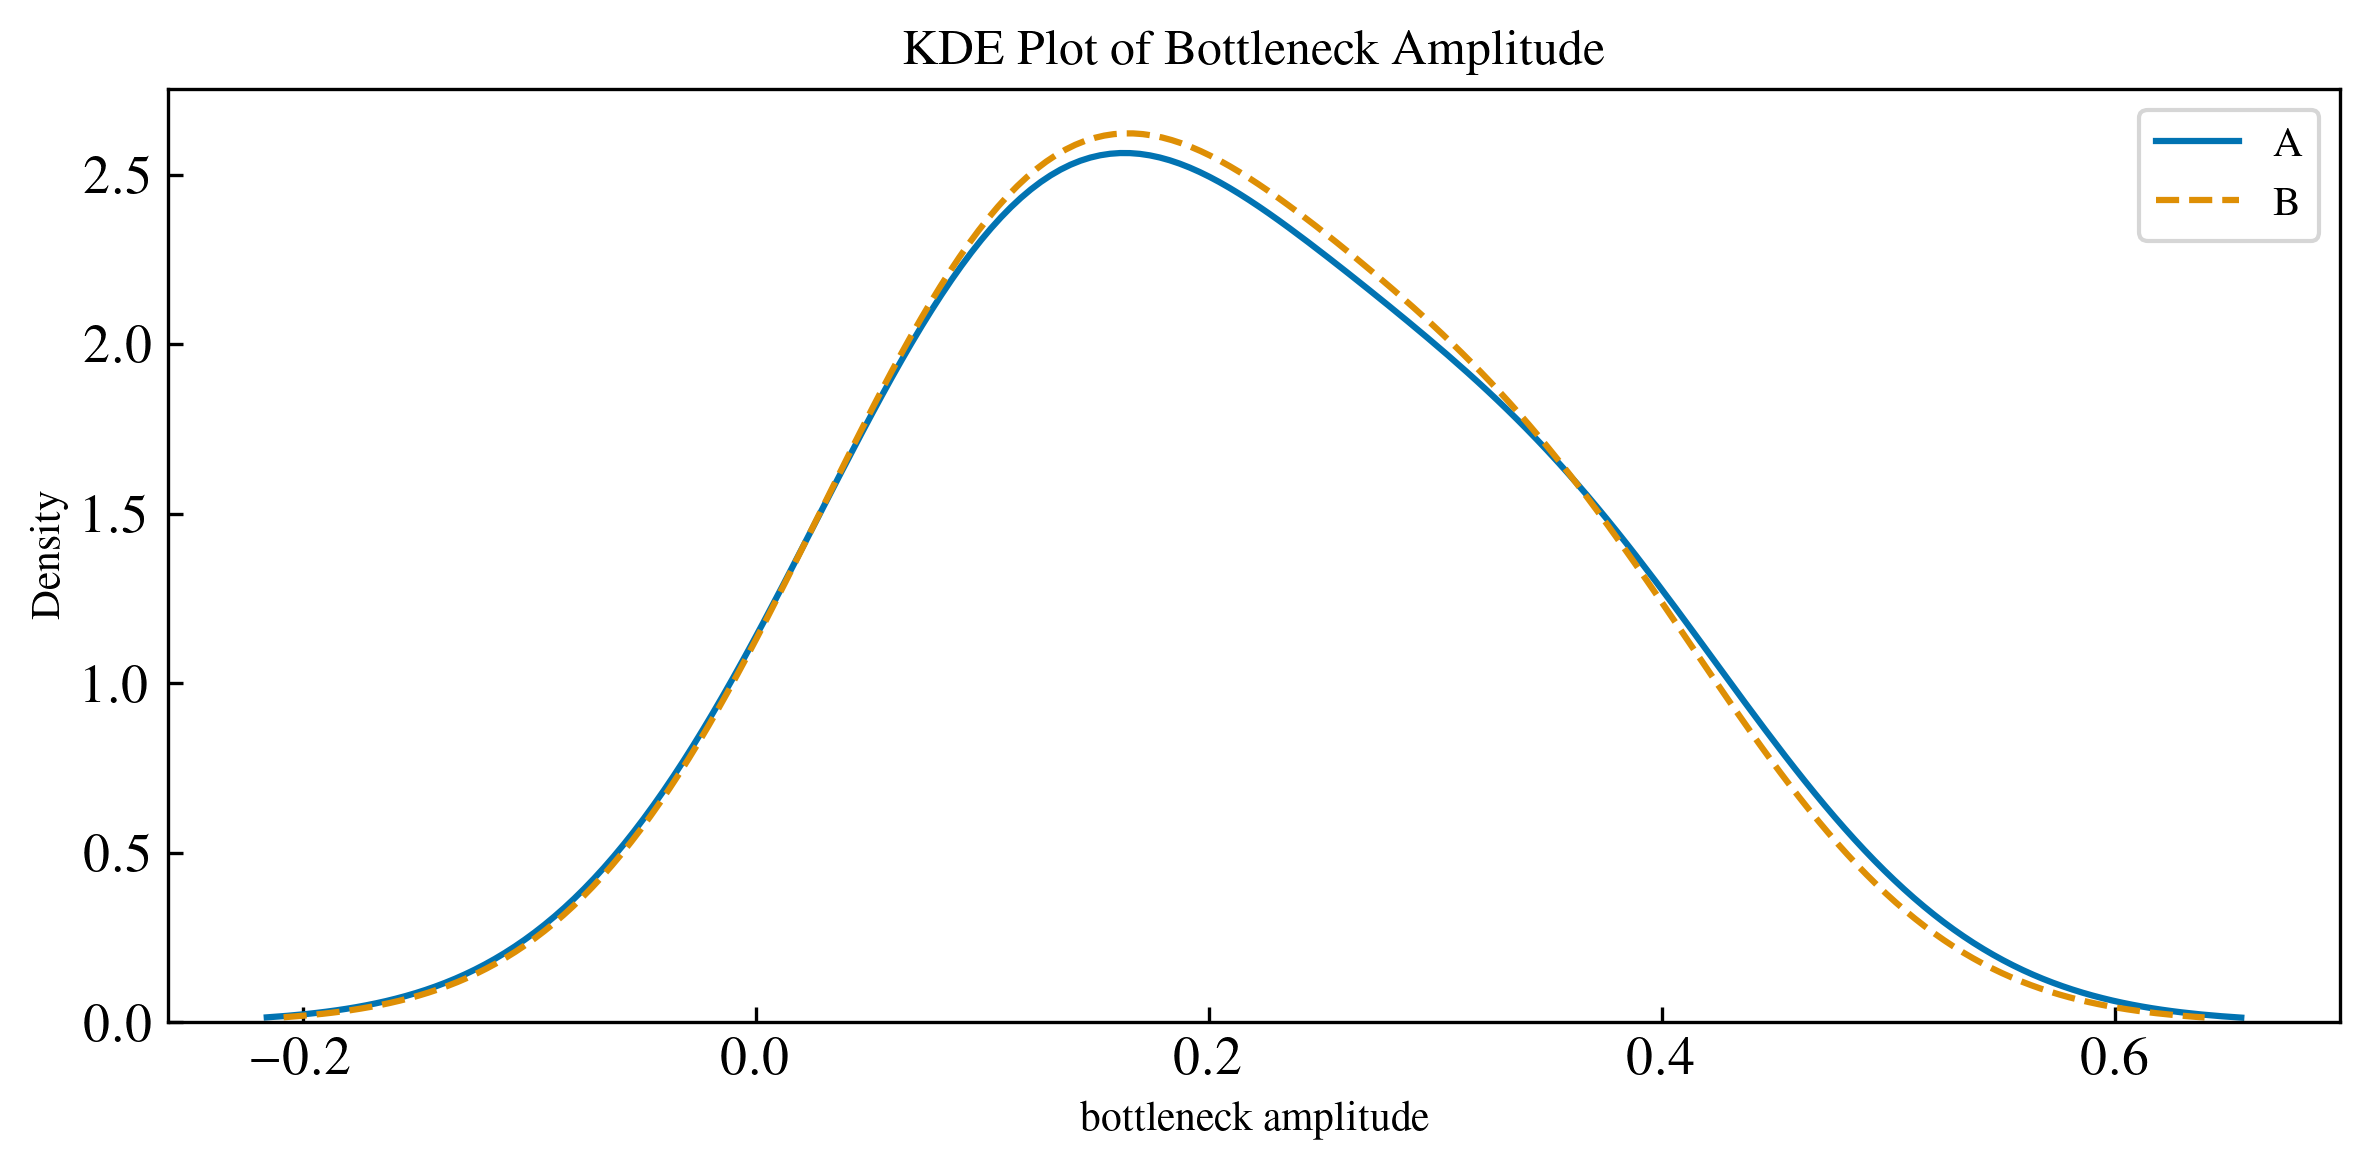

[INFO] 2025-09-05 16:39:41,254 - neurophorm.visualization - plot_kde_dist: done


In [8]:
nf.plot_kde_dist(
        data,
        feature_name="bottleneck_amplitude",
)

In [9]:
betti = nf.compute_betti_stat_features(data)

[INFO] 2025-09-05 16:39:41,279 - neurophorm.persistence - compute_betti_stat_features: done | datasets=2


[INFO] 2025-09-05 16:39:41,303 - neurophorm.visualization - plot_betti_stats_pvalues: start | feature=peak_y


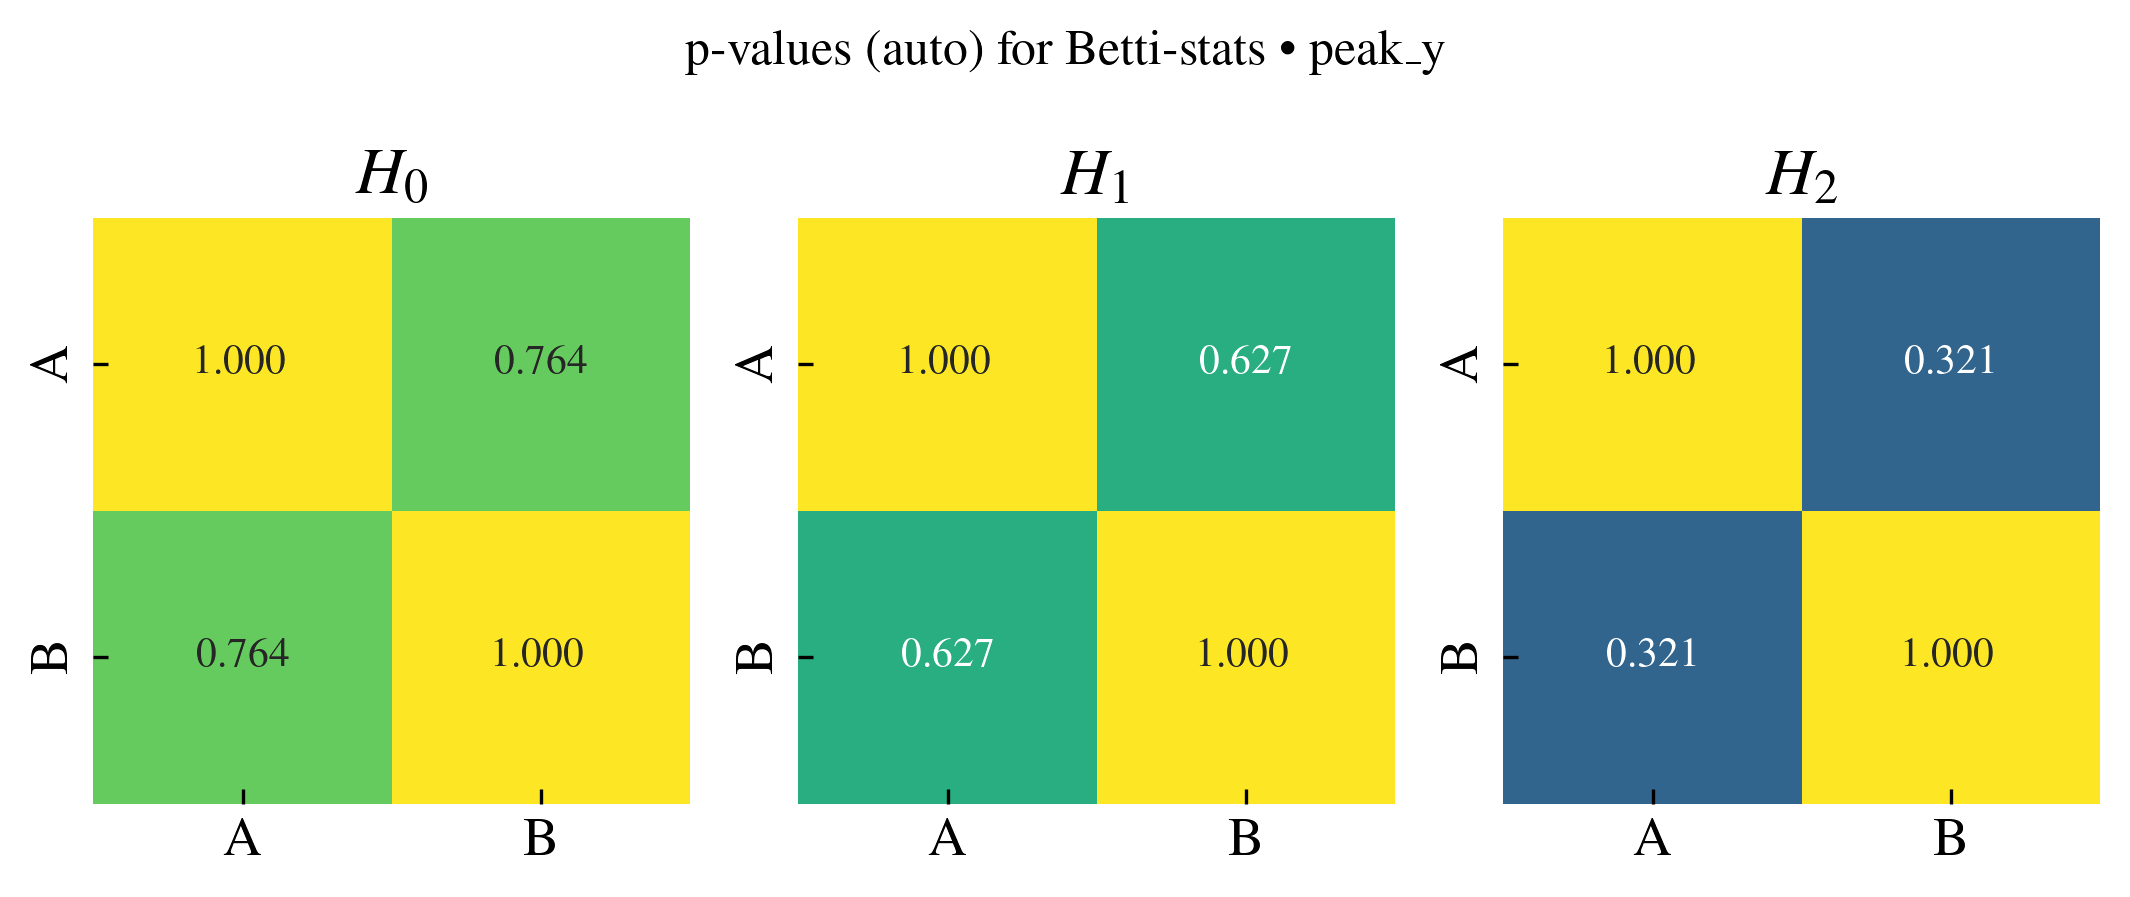

[INFO] 2025-09-05 16:39:42,114 - neurophorm.visualization - plot_betti_stats_pvalues: done


In [10]:
p_mats = nf.plot_betti_stats_pvalues(
    betti,
    feature_name="peak_y",
    multitest="bonferroni"
)